# Stable Diffusion with Neuronx: Text to image

In [1]:
import os
os.environ["NEURON_FUSE_SOFTMAX"] = "1"
from optimum.neuron import NeuronStableDiffusionPipeline

model_id = "stabilityai/stable-diffusion-2-1"
num_image_per_prompt = 1
input_shapes = {"batch_size": 1, "height": 768, "width": 768, "num_image_per_prompt": num_image_per_prompt}
compiler_args = {"auto_cast": "matmul", "auto_cast_type": "bf16"}

In [2]:
# Compile and save
stable_diffusion = NeuronStableDiffusionPipeline.from_pretrained(
    model_id, export=True, device_ids=[0, 1], **compiler_args, **input_shapes
)
# Load already exported artifacts
# stable_diffusion = NeuronStableDiffusionPipeline.from_pretrained("sd_neuron_768/", device_ids=[0, 1])

save_directory = "sd_neuron_768/"
stable_diffusion.save_pretrained(save_directory)

In [3]:
from diffusers import DPMSolverMultistepScheduler
stable_diffusion.scheduler = DPMSolverMultistepScheduler.from_config(stable_diffusion.scheduler.config)

In [4]:
# !pip install matplotlib

In [5]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import time
import copy
import numpy as np 

  0%|          | 0/50 [00:00<?, ?it/s]

[Inference Time] 6.09 seconds.


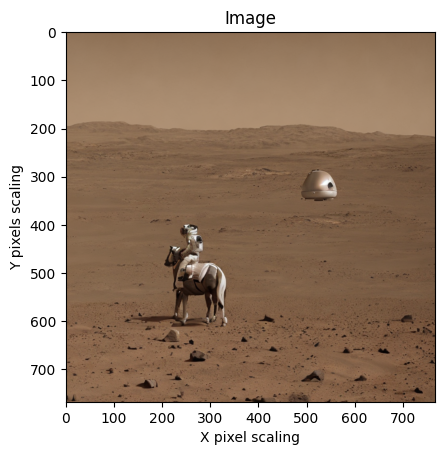

  0%|          | 0/50 [00:00<?, ?it/s]

[Inference Time] 6.02 seconds.


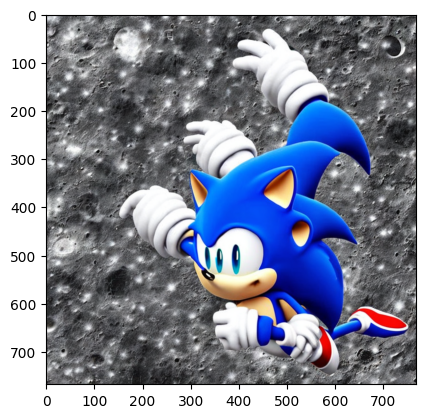

  0%|          | 0/50 [00:00<?, ?it/s]

[Inference Time] 6.03 seconds.


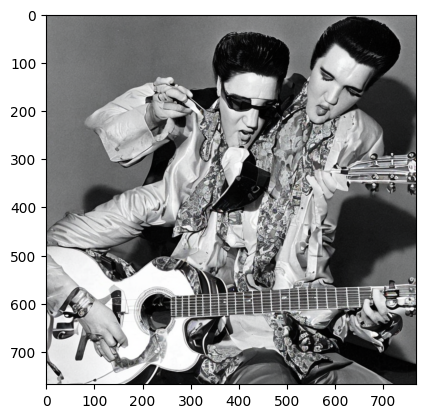

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# Run pipeline
prompt = [
    "a photo of an astronaut riding a horse on mars",
    "sonic on the moon",
    "elvis playing guitar while eating a hotdog",
    "saved by the bell",
    "engineers eating lunch at the opera",
    "panda eating bamboo on a plane",
    "A digital illustration of a steampunk flying machine in the sky with cogs and mechanisms, 4k, detailed, trending in artstation, fantasy vivid colors",
    "kids playing soccer at the FIFA World Cup"
]


plt.title("Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")

total_time = 0
for x in prompt:
    start_time = time.time()
    image = stable_diffusion(x).images[0]
    inf_time = time.time() - start_time
    print(f"[Inference Time] {np.round(inf_time, 2)} seconds.")
    image.save("image.png")
    image = mpimg.imread("image.png")
    #clear_output(wait=True)
    plt.imshow(image)
    plt.show()